#####  **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default="plotly_white"

In [2]:
df=pd.read_csv("blinkit_data.csv")

In [3]:
df.head(2)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.1,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.8,115.3492,5.0


In [4]:
print("Size of Data:", df.shape)

Size of Data: (8523, 12)


In [5]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [6]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

In [14]:
print(df["Item Fat Content"].unique())

['Regular' 'Low Fat']


In [15]:
df["Item Fat Content"]=df["Item Fat Content"].replace({"Regular":"regular", "Low Fat": "low fat"})

In [16]:
print(df["Item Fat Content"].unique())

['regular' 'low fat']


In [17]:
df["Item Fat Content"]=df["Item Fat Content"].replace({"regular":"Regular", "low fat": "Low Fat"})

###### **KPI Requirement**

In [7]:
## Total Sales
total_Sales=df['Sales'].sum()

# Avg_Sales
Avg_Sales=df['Sales'].mean()

# No of items sold
Item_sold=df['Sales'].count()

# Avg rating
Avg_ratings=df['Rating'].mean()

print(f'Total Sales:   ${total_Sales:,.0f}')
print(f'Avg Sales:     ${Avg_Sales:,.0f}')
print(f'Total Qty Sold:{Item_sold}')
print(f'Avg Ratings:   {Avg_ratings:,.1f}')

Total Sales:   $1,201,681
Avg Sales:     $141
Total Qty Sold:8523
Avg Ratings:   4.0


In [8]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

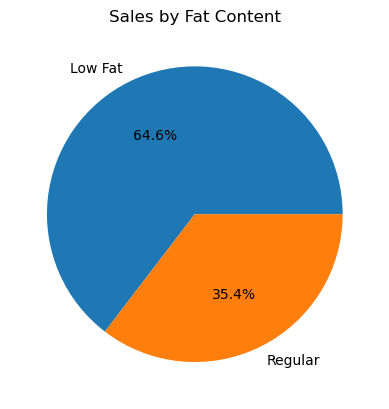

In [9]:
Sales_by_fat=df.groupby("Item Fat Content")["Sales"].sum()
plt.pie(Sales_by_fat,labels=Sales_by_fat.index, autopct='%.1f%%')
plt.title("Sales by Fat Content")
plt.show

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

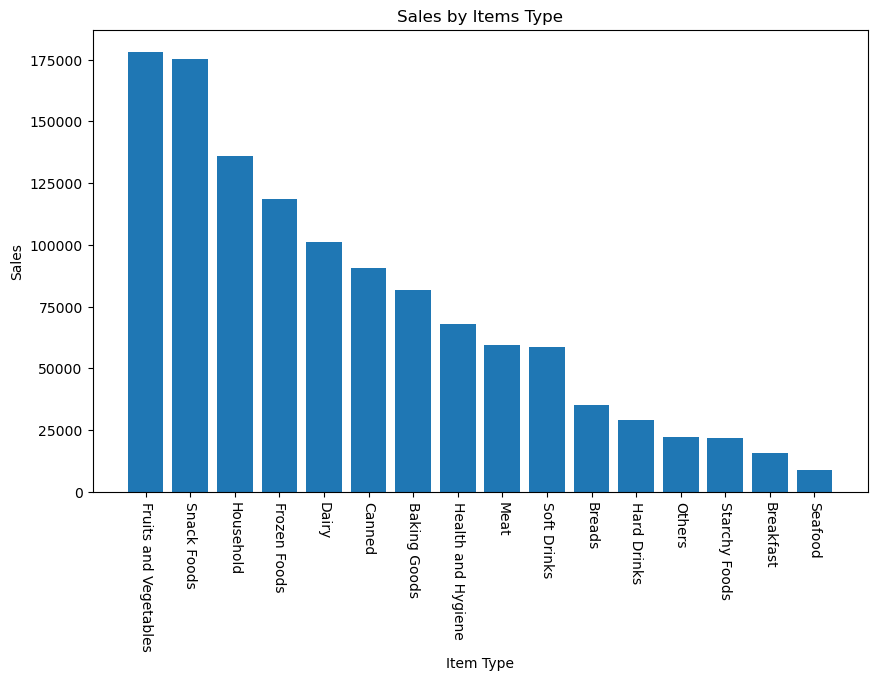

In [15]:
Sales_by_type=df.groupby("Item Type")["Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
ax=plt.bar(Sales_by_type.index,Sales_by_type.values)

plt.xticks(rotation=-90)

# Add labels


plt.xlabel('Item Type')
plt.ylabel("Sales")
plt.title("Sales by Items Type")
plt.tight_layout

In [23]:
df.columns
df["Item Fat Content"].unique()

array(['Regular', 'Low Fat'], dtype=object)

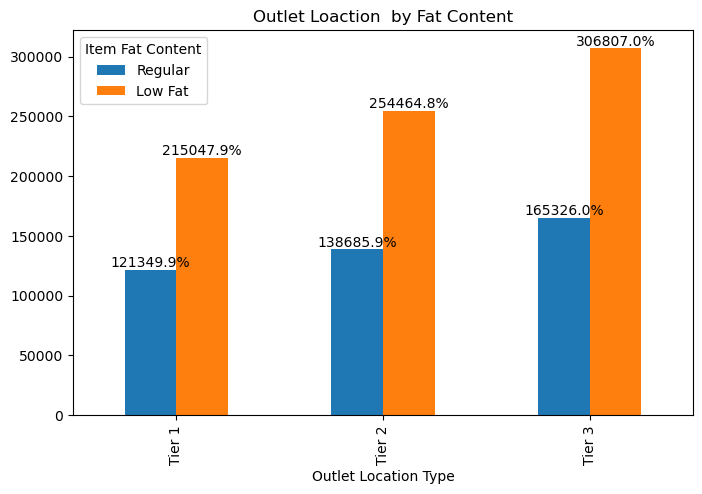

In [29]:
grouped=df.groupby(["Outlet Location Type","Item Fat Content"])["Sales"].sum().unstack()
grouped=grouped[["Regular","Low Fat"]]

ax= grouped.plot(kind='bar',figsize=(8,5),title="Outlet Loaction  by Fat Content")
# Add labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

In [30]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

AttributeError: 'list' object has no attribute 'containers'

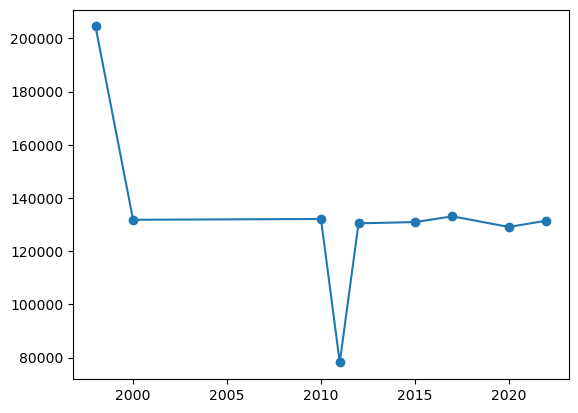

In [34]:
Sales_by_Year=df.groupby("Outlet Establishment Year")["Sales"].sum().sort_index()
ax=plt.plot(Sales_by_Year.index,Sales_by_Year.values,marker="o")


([<matplotlib.patches.Wedge at 0x266075b9e20>,
 [Text(0.8750618286999018, 0.6665334169810122, 'High'),
  Text(-0.9590008269523534, 0.5388111115267598, 'Medium'),
  Text(0.43640845644837833, -1.0097265269073326, 'Small')],
 [Text(0.4773064520181282, 0.36356368198964295, '20.7%'),
  Text(-0.5230913601558291, 0.2938969699236871, '42.3%'),
  Text(0.23804097624456996, -0.5507599237676358, '37.0%')])

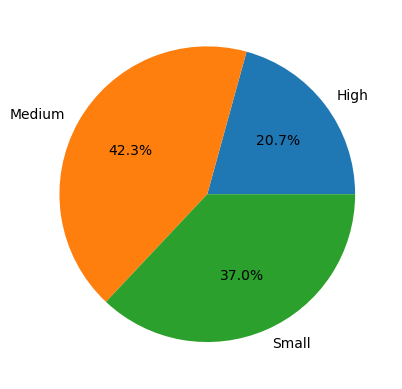

In [35]:
sales_by_Size=df.groupby("Outlet Size")["Sales"].sum()

plt.pie(sales_by_Size,labels=sales_by_Size.index, autopct="%.1f%%")